In [521]:
import pandas as pd

df = pd.read_csv('ds.csv')
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [523]:
df.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

In [524]:
# Menghitung data yang memiliki value kosong []
count_columns_with_empty_string = (df == '[]').sum()
print(count_columns_with_empty_string)

Tweet      0
Suicide    0
dtype: int64


In [525]:
# Membuang kolom kutipan yang berisi string kosong []
df = df.loc[df['Tweet'] != '[]']

count_columns_with_empty_string = (df == '[]').sum()
print(count_columns_with_empty_string)

Tweet      0
Suicide    0
dtype: int64


In [526]:
df['Tweet'][4]

'Trying out &quot;Delicious Library 2&quot; with mixed results The bar code thought I wanted to add a sport bra instead of a drill Cool app tho!'

In [527]:
df['Tweet'][7]

'@jakepaul @jamescharles @LoganPaul Just because shane made a Series on you Doesnt mean people take you seriously, yâ\x80¦ https://t.co/D5rA0nua0U'

In [528]:
id_stopword_dict = pd.read_csv('ST.csv', header=None, encoding='latin-1')
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})
id_stopword_dict.head()


,stopword
0,a
1,a's
2,able
3,about
4,above


In [529]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "coz" : "because",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "didn" : "didn't",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "eng":"english",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "ftw" : "for the win",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "ger" : "German",
    "ger/rus/eng" : "german,rusian,english",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "hwo're":"how are",
    "hav" : "have",
    "hoe" : "whore",
    "herme" : "hear me",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "ill" : "i'll",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "jst": "just",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    'pls' : "please",
    "plz" : "please",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "rus" :"rusian",
    "re" : "are",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "tf" : "the fuck",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wot" : "what",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "wit" : "with",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "youve" : "you've",
    "yr" : "your",
    "ve" : "have",
    "zzz" : "sleeping bored and tired"
}

In [530]:
# def convert_abbrev(word):
#     return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
# df['slang'] = df['Tweet'].apply(convert_abbrev)
# df

# def convert_abbrev(word):
#     return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

def convert_abbrev(word):
    if ',' in word:
        # Jika ada koma, pisahkan kata dan cek kamus
        words = word.split(',')
        return ', '.join(abbreviations.get(w.lower(), w) for w in words)
    # elif word.startswith('@'):
    #     # Memisahkan kata dari kode seperti 'ger/rus/eng'
    #     code_word = word[1:]
        return abbreviations.get(code_word, word)
    else:
        # Menggunakan kamus untuk mengganti kata
        return abbreviations.get(word.lower(), word)

# Mengaplikasikan fungsi pada DataFrame
df['preprocess'] = df['Tweet'].astype(str).apply(lambda x: ' '.join(convert_abbrev(word) for word in x.split()))



In [531]:
df["preprocess"][15]

'@Turbizzle Goooooood how are you?'

In [532]:
df["preprocess"][42]

'i need to put myself to rest i have crashed my motorcycle today i don t know how but i m mostly fine it was the most beautiful moment of my life i know it s sick to think that but it felt good to see people approach me to help me after the crash the feeling of my body being dragged by my bike for several meters on the ground looking at the sky while this one song played in my earphonesi have just felt emptiness for the past yearsi don t want this second chance i want to get on my broken bike bring it up to speed one last time and then just end it all i just don t want to drown anymore please'

In [533]:
df["preprocess"][20]

'@sadegsi, german,rusian,english, I want to die so much,  I dont want to be here anymore'

In [534]:
df["preprocess"][103]

"I just sneezed twice. Me thinks there's at least one ghost in my house now."

In [535]:
import contractions
import pandas as pd
import html
# Fungsi untuk memperluas kontraksi
def expand_contractions(text):
    text = html.unescape(text)
    return contractions.fix(text)
df['preprocess'] = df['preprocess'].apply(expand_contractions)

import contractions
import pandas as pd

# Fungsi untuk memperluas kontraksi
def expand2_contractions(text):
    return contractions.fix(text)
df['preprocess'] = df['preprocess'].apply(expand2_contractions)
df

,Tweet,Suicide,preprocess
0,making some lunch,Not Suicide post,making some lunch
1,@Alexia You want his money.,Not Suicide post,@Alexia You want his money.
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets Hey Jer! Since when did y...
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,"Trying out ""Delicious Library 2"" with mixed re..."
...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my Nokia N95-1
1783,Starting my day out with a positive attitude! ...,Not Suicide post,Starting my day out with a positive attitude! ...
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 Hey, it is 5 am...give a girl s..."
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...


In [536]:
df["preprocess"][6]

'@mcm180 you have got a list for fellow #hotties? You going to have to share that one Amigo!'

In [537]:
df["preprocess"][4]

'Trying out "Delicious Library 2" with mixed results The bar code thought I wanted to add a sport bra instead of a drill Cool application though!'

In [538]:
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import html

nltk.download('punkt')

from nltk.stem import PorterStemmer

def lowercase(text):
    return text.lower()

punct = string.punctuation
def remove_punctuation(text):
    no_punct= [words for words in text if words not in punct]
    words_wo_punct = ''.join(no_punct)
    
    return words_wo_punct

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text) # Remove every '\n'
    text = re.sub('user', ' ', text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove every url
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub('@[\w_]+', ' ', text) # Remove @
    text = re.sub('#[\w_]+', ' ', text) # Remove tag hashtag
    text = re.sub('Ã¢Â€Â™', "'",text)
    text = re.sub('â', "",text)
    text = re.sub('\d+', '', text)

    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    text = re.sub(r"(.)\1{2,}", r"\1", text)
    return text

def remove_stopword(text):
    text = ' '.join([ ' ' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip() 
    return text

# import num2words

# def convert_number_to_words(number):
#     if isinstance(number, str) and number.isdigit():
#         number = int(number)
#     if isinstance(number, int):
#         return num2words.num2words(number)
#     else:
#         return number
    
def stemming(text):
    # Tokenisasi teks menjadi kata-kata
    words = word_tokenize(text)
    
    # Inisialisasi stemmer Porter
    porter = PorterStemmer()
    
    # Melakukan stemming pada setiap kata
    stemmed_words = [porter.stem(word) for word in words]
    
    # Menggabungkan kata-kata yang telah distem menjadi sebuah teks kembali
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def english_lemmatization(text):
    # Tokenisasi teks menjadi kata-kata
    words = word_tokenize(text)
    
    # Inisialisasi lemmatizer WordNet
    lemmatizer = WordNetLemmatizer()
    
    # Melakukan lemmatization pada setiap kata
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Menggabungkan kata-kata yang telah dilemat menjadi sebuah teks kembali
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

from nltk.stem import LancasterStemmer

def lancaster_stemming(text):
    words = word_tokenize(text)
    lancaster = LancasterStemmer()
    stemmed_words = [lancaster.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

import contractions
import pandas as pd

# Fungsi untuk memperluas kontraksi
def expand2_contractions(text):
    return contractions.fix(text)

def convert_abbrev(text):
    return abbreviations[text.lower()] if text.lower() in abbreviations.keys() else text

    
# def double_word(text):
#     text = re.sub("(.)\\1{2,}","\\2",text)
#     return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [539]:
def preprocess(text):
    text = html.unescape(text)
    text= convert_abbrev(text)
    # text = expand2_contractions(text)
    # text= convert_number_to_words(text)
    text = lowercase (text) # 1
    text = remove_unnecessary_char(text) 
    text = remove_nonaplhanumeric(text) 
    text = expand2_contractions(text)
    text = remove_stopword (text)
    text= remove_punctuation(text)
    # text = stemming(text)
    text = english_lemmatization(text)
    # text= lancaster_stemming(text)
    
    # text = double_word(text)
    
    return text

In [540]:
df['preprocess'] = df['preprocess'].apply(preprocess)

In [541]:
df.to_csv('clean.csv', index=False)

In [542]:
import pandas as pd

data1 = pd.read_csv("clean.csv")
data1

,Tweet,Suicide,preprocess
0,making some lunch,Not Suicide post,making lunch
1,@Alexia You want his money.,Not Suicide post,money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,crap forever put sleep day
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,hey jer start twittering
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,delicious library mixed result bar code though...
...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,forgotten love nokia
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting day positive attitude great watch gre...
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,hey give girl credit
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,drunken besties stumble room run sober cj drun...


In [543]:
print(f"sebelum di preprocessing:\n{df['Tweet'][96]}\n")
print(f"sesudah di preprocessing:\n{data1['preprocess'][96]}\n")

sebelum di preprocessing:
Rosie: âdoes he think Iâm gonna be single forever?â

sesudah di preprocessing:
rosie single forever



In [544]:
print(f"sebelum di preprocessing:\n{df['Tweet'][47]}\n")
print(f"sesudah di preprocessing:\n{data1['preprocess'][47]}\n")

sebelum di preprocessing:
i wanna die. i donât deserve a piece of anything. i donât belong anywhere. iâm sick and tired of everything. the saâ¦ https://t.co/8hbfNffXii

sesudah di preprocessing:
die not deserve piece not belong sick tired sa



In [545]:
data1.isnull().sum()

Tweet          2
Suicide        0
preprocess    32
dtype: int64

In [546]:
data1['preprocess'].fillna('', inplace=True)
data1['Tweet'].fillna('', inplace=True)

In [547]:
data1.isnull().sum()

Tweet         0
Suicide       0
preprocess    0
dtype: int64

In [548]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data1['preprocess'])

In [549]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [550]:
tfidf = TfidfVectorizer(max_features= 20000, ngram_range=(1,3), analyzer='char')

In [551]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Menggabungkan kata-kata dari kolom 'Description' menjadi satu teks untuk setiap baris
corpus = data1['preprocess'].astype(str)

# Membuat objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Menghitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Mengekstrak nama fitur (kata-kata) dan nilai IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menyimpan hasil TF-IDF dalam bentuk matriks ke dalam DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menyimpan DataFrame hasil ke dalam file CSV
tfidf_df.to_csv('tfidf_matrix.csv', index=False)


In [552]:
x = tfidf.fit_transform(data1['preprocess'])
y = data1['Suicide']

x.shape

(1787, 4910)

In [553]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [554]:
clf = LinearSVC()
clf.fit(x_train, y_train)

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [555]:
y_pred =clf.predict(x_test)

In [556]:
print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

       Not Suicide post       0.92      0.93      0.93       224
Potential Suicide post        0.89      0.87      0.88       134

               accuracy                           0.91       358
              macro avg       0.90      0.90      0.90       358
           weighted avg       0.91      0.91      0.91       358



In [557]:
# from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
# PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


In [558]:
list_corpus = data1["preprocess"].tolist()
list_labels = data1["Suicide"].tolist()

random_state_split = 42
X_train, X_test, Y_train, Y_test = train_test_split(list_corpus, list_labels, test_size=0.2,random_state=random_state_split)

In [559]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

 menggunakan LSA (Latent Semantic Analysis) atau TruncatedSVD (Singular Value Decomposition yang dipotong)

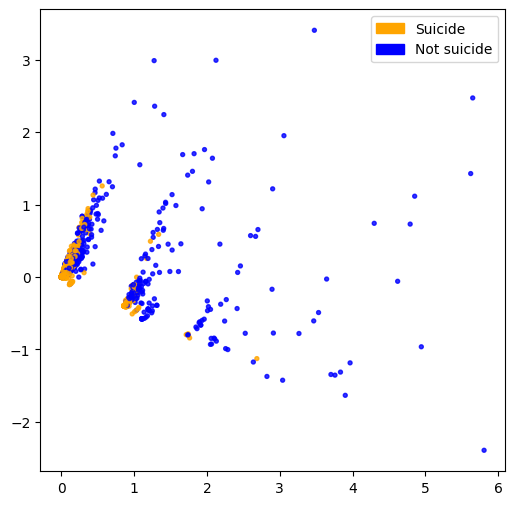

In [560]:
def plot_LSA(test_data, test_labels, plot=True):
        #      savepath="LSA_demo.csv", plot=True):
#LSA digunakan untuk mengurangi dimensi fitur menjadi 2 dimensi. Parameter n_components=2 menunjukkan bahwa kita ingin mendapatkan dua komponen utama.
    lsa = TruncatedSVD(n_components=2)
    lsa_scores = lsa.fit_transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['orange', 'blue']
    if plot:
        plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=.8, c=color_column, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='Suicide')
        blue_patch = mpatches.Patch(color='blue', label='Not suicide')
        plt.legend(handles=[orange_patch, blue_patch], prop={'size': 10})

        # # Simpan data ke dalam file CSV
        # result_df = pd.DataFrame({'LSA1': lsa_scores[:, 0], 'LSA2': lsa_scores[:, 1], 'Label': test_labels})
        # result_df.to_csv(savepath, index=False)

fig = plt.figure(figsize=(6,6))
plot_LSA(X_train_counts, Y_train)
        #  savepath="LSA_demo.csv")
plt.show()


In [561]:
def tfidf(data1):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data1)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

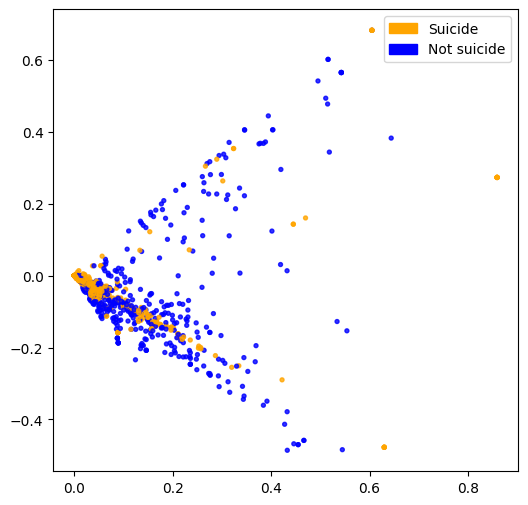

In [562]:
fig = plt.figure(figsize=(6,6))          
plot_LSA(X_train_tfidf, Y_train)
plt.show()

In [563]:
from sklearn.feature_extraction.text import CountVectorizer

def cv(data1, ngram = 1, MAX_NB_WORDS = 75000):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = count_vectorizer.fit_transform(data1).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer


In [564]:
import pandas as pd
def print_out(emb, feat, ngram, compared_sentence=0):
    print(ngram, "bag-of-words: ")
    print(feat.get_feature_names_out(), "\n")
    print(ngram, "bag-of-feature: ")
    print(feat.vocabulary_, "\n")
    print("BoW matrix:")
    print(pd.DataFrame(emb.transpose(), index=feat.get_feature_names_out()).head(), "\n")
    print(ngram, "vector example:")
    print(data1["preprocess"][compared_sentence])
    print(emb[compared_sentence], "\n")
    # print_out(X_train_counts, count_vectorizer, "Uni-gram", savepath="bow_matrix.csv")
    bow_matrix = pd.DataFrame(emb.transpose(), index=feat.get_feature_names_out())

    # Simpan ke dalam file CSV
    bow_matrix.to_csv('bow_matrix.csv', index_label='Word') 



In [565]:
test_corpus = data1["preprocess"][:5].tolist()
print("The test corpus: ", test_corpus, "\n")

test_cv_em_1gram, test_cv_1gram = cv(test_corpus, ngram=1)
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Uni-gram")


The test corpus:  ['making lunch', 'money', 'crap forever put sleep day', 'hey jer start twittering', 'delicious library mixed result bar code thought wanted add sport bra drill cool application'] 

count vectorize with 26 features
Uni-gram bag-of-words: 
['add' 'application' 'bar' 'bra' 'code' 'cool' 'crap' 'day' 'delicious'
 'drill' 'forever' 'hey' 'jer' 'library' 'lunch' 'making' 'mixed' 'money'
 'put' 'result' 'sleep' 'sport' 'start' 'thought' 'twittering' 'wanted'] 

Uni-gram bag-of-feature: 
{'making': 15, 'lunch': 14, 'money': 17, 'crap': 6, 'forever': 10, 'put': 18, 'sleep': 20, 'day': 7, 'hey': 11, 'jer': 12, 'start': 22, 'twittering': 24, 'delicious': 8, 'library': 13, 'mixed': 16, 'result': 19, 'bar': 2, 'code': 4, 'thought': 23, 'wanted': 25, 'add': 0, 'sport': 21, 'bra': 3, 'drill': 9, 'cool': 5, 'application': 1} 

BoW matrix:
             0  1  2  3  4
add          0  0  0  0  1
application  0  0  0  0  1
bar          0  0  0  0  1
bra          0  0  0  0  1
code        

In [566]:
test_cv_em_2gram, test_cv_2gram = cv(test_corpus, ngram=2)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Bi-gram")

count vectorize with 21 features
Bi-gram bag-of-words: 
['add sport' 'bar code' 'bra drill' 'code thought' 'cool application'
 'crap forever' 'delicious library' 'drill cool' 'forever put' 'hey jer'
 'jer start' 'library mixed' 'making lunch' 'mixed result' 'put sleep'
 'result bar' 'sleep day' 'sport bra' 'start twittering' 'thought wanted'
 'wanted add'] 

Bi-gram bag-of-feature: 
{'making lunch': 12, 'crap forever': 5, 'forever put': 8, 'put sleep': 14, 'sleep day': 16, 'hey jer': 9, 'jer start': 10, 'start twittering': 18, 'delicious library': 6, 'library mixed': 11, 'mixed result': 13, 'result bar': 15, 'bar code': 1, 'code thought': 3, 'thought wanted': 19, 'wanted add': 20, 'add sport': 0, 'sport bra': 17, 'bra drill': 2, 'drill cool': 7, 'cool application': 4} 

BoW matrix:
                  0  1  2  3  4
add sport         0  0  0  0  1
bar code          0  0  0  0  1
bra drill         0  0  0  0  1
code thought      0  0  0  0  1
cool application  0  0  0  0  1 

Bi-gram vecto

In [567]:
test_cv_em_3gram, test_cv_3gram = cv(test_corpus, ngram=3)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Tri-gram")

count vectorize with 17 features
Tri-gram bag-of-words: 
['add sport' 'bar code' 'bra drill' 'code thought' 'cool application'
 'crap forever' 'delicious library' 'drill cool' 'forever put' 'hey jer'
 'jer start' 'library mixed' 'making lunch' 'mixed result' 'put sleep'
 'result bar' 'sleep day' 'sport bra' 'start twittering' 'thought wanted'
 'wanted add'] 

Tri-gram bag-of-feature: 
{'making lunch': 12, 'crap forever': 5, 'forever put': 8, 'put sleep': 14, 'sleep day': 16, 'hey jer': 9, 'jer start': 10, 'start twittering': 18, 'delicious library': 6, 'library mixed': 11, 'mixed result': 13, 'result bar': 15, 'bar code': 1, 'code thought': 3, 'thought wanted': 19, 'wanted add': 20, 'add sport': 0, 'sport bra': 17, 'bra drill': 2, 'drill cool': 7, 'cool application': 4} 

BoW matrix:
                  0  1  2  3  4
add sport         0  0  0  0  1
bar code          0  0  0  0  1
bra drill         0  0  0  0  1
code thought      0  0  0  0  1
cool application  0  0  0  0  1 

Tri-gram ve

In [568]:
def cv1(data, ngram=1):
    count_vectorizer = CountVectorizer(ngram_range=(ngram, ngram))
    emb = count_vectorizer.fit_transform(data).toarray()
    return emb, count_vectorizer
# print("count vectorize with", str(np.array(emb).shape[1]), "features")
  

# Contoh penggunaan
list_corpus = data1["preprocess"]
list_labels = data1["Suicide"]
X_train, X_test, Y_train, Y_test = train_test_split(list_corpus, list_labels, test_size=0.2,random_state=random_state_split)
X_train_counts, count_vectorizer = cv1(X_train)

# Contoh panggilan fungsi print_out tanpa MAX_NB_WORDS
# Contoh panggilan fungsi print_out tanpa MAX_NB_WORDS
print_out(X_train_counts, count_vectorizer, ngram="Uni-gram")

def save_bow_matrix_to_csv(emb, feat, filename):
    bow_matrix = pd.DataFrame(emb.transpose(), index=feat.get_feature_names_out())
    bow_matrix.to_csv(filename, index_label='Word')

# Panggil fungsi untuk menyimpan matriks BoW ke dalam file CSV
save_bow_matrix_to_csv(X_train_counts, count_vectorizer, "bow_matrix_no_max_words.csv")


Uni-gram bag-of-words: 
['aah' 'abandoned' 'abc' ... 'zoloft' 'zombie' 'zone'] 

Uni-gram bag-of-feature: 
{'mhm': 2041, 'ohh': 2209, 'early': 997, 'feel': 1167, 'whatching': 3370, 'open': 2220, 'arm': 171, 'gary': 1309, 'not': 2179, 'realise': 2534, 'trustee': 3205, 'load': 1886, 'find': 1191, 'rase': 2522, 'structure': 2975, 'confusing': 668, 'here': 1509, 'zealand': 3481, 'forward': 1257, 'starting': 2935, 'great': 1394, 'night': 2167, 'tuesday': 3209, 'metropolis': 2038, 'hanover': 1455, 'god': 1350, 'replying': 2582, 'made': 1936, 'happy': 1464, 'folow': 1239, 'learnt': 1832, 'blog': 353, 'decently': 824, 'functional': 1293, 'work': 3418, 'today': 3142, 'wheat': 3372, 'thins': 3107, 'diet': 891, 'dr': 955, 'pepper': 2303, 'breakfast': 401, 'champion': 523, 'people': 2301, 'wake': 3320, 'late': 1803, 'grab': 1380, 'thing': 3104, 'damn': 783, 'vending': 3289, 'machine': 1934, 'depressing': 854, 'standing': 2924, 'waiting': 3319, 'sad': 2653, 'snack': 2848, 'pavlovian': 2283, 'bitch'

In [569]:
# Membuat representasi BoW tanpa batasan jumlah kata
test_cv_em_1gram, test_cv_1gram = cv1(list_corpus, ngram=2)
# Menampilkan hasil BoW
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Bi-gram")

Bi-gram bag-of-words: 
['aah sleep' 'abandoned hour' 'abdul tired' ... 'zombie store' 'zone damn'
 'zone head'] 

Bi-gram bag-of-feature: 
{'making lunch': 5202, 'crap forever': 1507, 'forever put': 2903, 'put sleep': 6695, 'sleep day': 7532, 'hey jer': 3880, 'jer start': 4311, 'start twittering': 7742, 'delicious library': 1858, 'library mixed': 4661, 'mixed result': 5437, 'result bar': 6948, 'bar code': 560, 'code thought': 1299, 'thought wanted': 8256, 'wanted add': 8925, 'add sport': 65, 'sport bra': 7690, 'bra drill': 847, 'drill cool': 2151, 'cool application': 1457, 'good hear': 3345, 'hear continue': 3768, 'continue holy': 1439, 'holy week': 3931, 'list fellow': 4773, 'fellow share': 2710, 'share amigo': 7338, 'shane made': 7336, 'made series': 5127, 'series not': 7297, 'not people': 5888, 'time warsaw': 8351, 'warsaw beer': 8951, 'beer garden': 623, 'garden chilling': 3160, 'hate life': 3696, 'life laugh': 4709, 'laugh as': 4554, 'as hope': 354, 'hope die': 3997, 'die sumn': 1

In [570]:
# Membuat representasi BoW tanpa batasan jumlah kata
test_cv_em_1gram, test_cv_1gram = cv1(list_corpus, ngram=3)
# Menampilkan hasil BoW
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Tri-gram")

Tri-gram bag-of-words: 
['aah sleep cloverfield' 'abandoned hour nap' 'abit cheese monsieur' ...
 'zombie store sit' 'zone damn people' 'zone head today'] 

Tri-gram bag-of-feature: 
{'crap forever put': 1311, 'forever put sleep': 2558, 'put sleep day': 6167, 'hey jer start': 3475, 'jer start twittering': 3872, 'delicious library mixed': 1629, 'library mixed result': 4205, 'mixed result bar': 4917, 'result bar code': 6398, 'bar code thought': 494, 'code thought wanted': 1123, 'thought wanted add': 7618, 'wanted add sport': 8237, 'add sport bra': 60, 'sport bra drill': 7114, 'bra drill cool': 736, 'drill cool application': 1892, 'good hear continue': 2961, 'hear continue holy': 3370, 'continue holy week': 1253, 'list fellow share': 4319, 'fellow share amigo': 2395, 'shane made series': 6785, 'made series not': 4634, 'series not people': 6750, 'time warsaw beer': 7708, 'warsaw beer garden': 8264, 'beer garden chilling': 546, 'hate life laugh': 3302, 'life laugh as': 4252, 'laugh as hope'

In [571]:
test_cv_em_3gram, test_cv_3gram = cv1(list_corpus, ngram=3)
print_out(test_cv_em_3gram, test_cv_3gram, ngram="Tri-gram")

Tri-gram bag-of-words: 
['aah sleep cloverfield' 'abandoned hour nap' 'abit cheese monsieur' ...
 'zombie store sit' 'zone damn people' 'zone head today'] 

Tri-gram bag-of-feature: 
{'crap forever put': 1311, 'forever put sleep': 2558, 'put sleep day': 6167, 'hey jer start': 3475, 'jer start twittering': 3872, 'delicious library mixed': 1629, 'library mixed result': 4205, 'mixed result bar': 4917, 'result bar code': 6398, 'bar code thought': 494, 'code thought wanted': 1123, 'thought wanted add': 7618, 'wanted add sport': 8237, 'add sport bra': 60, 'sport bra drill': 7114, 'bra drill cool': 736, 'drill cool application': 1892, 'good hear continue': 2961, 'hear continue holy': 3370, 'continue holy week': 1253, 'list fellow share': 4319, 'fellow share amigo': 2395, 'shane made series': 6785, 'made series not': 4634, 'series not people': 6750, 'time warsaw beer': 7708, 'warsaw beer garden': 8264, 'beer garden chilling': 546, 'hate life laugh': 3302, 'life laugh as': 4252, 'laugh as hope'

In [572]:
from gensim.models import Word2Vec
import numpy as np

# Ubah dokumen menjadi token
tokenized_corpus = [doc.split() for doc in X_train]
token_corpus = [doc.split() for doc in X_test]
# Latih model Word2Vec
w2v_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1)
def get_vector(word, model):
    try:
        return model.wv[word]
    except KeyError:
        # Jika kata tidak ditemukan, kembalikan vektor nol
        return np.zeros(model.vector_size)
    
# Mendapatkan vektor kata untuk setiap dokumen
X_train_word2vec = [np.mean([get_vector(word, w2v_model) for word in words], axis=0) for words in tokenized_corpus]
X_test_word2vec = [np.mean([get_vector(word, w2v_model) for word in words], axis=0) for words in token_corpus]

c:\Users\ASUS\envs\env1\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ASUS\envs\env1\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [573]:
import numpy as np

def get_embeddings(model, sentences, k=300):
    embeddings = []
    for sentence in sentences:
        words = sentence.split()
        # Mendapatkan vektor kata untuk setiap kata dalam kalimat
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if not word_vectors:
            # Jika tidak ada vektor kata yang ditemukan, gunakan vektor nol
            embeddings.append(np.zeros(k))
        else:
            # Hitung rata-rata vektor kata dalam kalimat
            sentence_embedding = np.mean(word_vectors, axis=0)
            embeddings.append(sentence_embedding)
    return embeddings

# Contoh penggunaan
embeddings_word2vec = get_embeddings(w2v_model, data1["preprocess"], k=300)
print("Embedding matrix size", len(embeddings_word2vec), len(embeddings_word2vec[0]))
print("Kalimat: \"%s\" hasil embedding values: " % data1["preprocess"][0])
print(embeddings_word2vec[0])


Embedding matrix size 1787 100
Kalimat: "making lunch" hasil embedding values: 
[-0.00136393  0.00063373  0.00037375 -0.00946068 -0.00024544 -0.00543823
  0.00057077 -0.0055693   0.00538337  0.00067297 -0.00633234  0.00518173
 -0.00566128 -0.00092683  0.0004454  -0.00513532 -0.00488674 -0.00394947
 -0.00326988 -0.00506041  0.00486026 -0.00327586  0.01008619  0.00112512
 -0.00447724  0.00504589 -0.00168313 -0.00228962  0.0006443   0.00191105
  0.00330166  0.00655427  0.0016813   0.00649042 -0.00104256 -0.00512857
 -0.00585337 -0.00452171 -0.00476525  0.00258071 -0.00033064  0.00359521
 -0.00384315  0.00111907  0.00461539 -0.00475436  0.00118479 -0.00021997
  0.00165151  0.00538305 -0.00153716  0.00520771  0.0017591  -0.00559737
  0.00554196 -0.00120296 -0.00243888  0.00234109 -0.00069328 -0.00072179
  0.00629885 -0.00575398 -0.00241017  0.00086285 -0.00090637 -0.00075542
  0.00138643  0.0042883   0.00106957  0.010287   -0.00793371 -0.00694073
 -0.00227446  0.00322459  0.00052582 -0.0038

Mencari Akurasi terbaik dengan Kfold dari Tf-Idf

In [574]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.svm import LinearSVC


# Konversi matriks sparse menjadi dense array
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Membuat array kosong untuk menampung beberapa algoritma klasifikasi
models = []

# Membuat array asosiatif berisi nama algoritma dan algoritma klasifikasinya
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7, metric='euclidean')))
models.append(('Linear SVM', LinearSVC(dual=True)))


seed = 7
scoring = 'accuracy'
results = []

# Membagi data menjadi training dan validation set menggunakan k-fold cross-validation, dengan k = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=7, random_state=seed, shuffle=True)

    # Menguji akurasi dari masing-masing model menggunakan validasi data
    cv_results = model_selection.cross_val_score(model, X_train_dense, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Decision Tree : 0.880344 (0.017287)
Random Forest : 0.898535 (0.013252)
SVM : 0.874756 (0.016581)
Gaussian Naive Bayes : 0.619314 (0.029721)
Logistic Regression : 0.853751 (0.012864)
KNN : 0.678783 (0.019604)
Linear SVM : 0.899235 (0.011333)


Mencari Akurasi terbaik dengan Kfold dari BOW

In [575]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.svm import LinearSVC


# Konversi matriks sparse menjadi dense array
x_train_1 = X_train_counts
x_test_1 = X_test_counts

# Membuat array kosong untuk menampung beberapa algoritma klasifikasi
models = []

# Membuat array asosiatif berisi nama algoritma dan algoritma klasifikasinya
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7, metric='euclidean')))
models.append(('Linear SVM', LinearSVC(dual=True)))


seed = 7
scoring = 'accuracy'
results = []

# Membagi data menjadi training dan validation set menggunakan k-fold cross-validation, dengan k = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=7, random_state=seed, shuffle=True)

    # Menguji akurasi dari masing-masing model menggunakan validasi data
    cv_results = model_selection.cross_val_score(model, x_train_1, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Decision Tree : 0.885929 (0.015907)
Random Forest : 0.902729 (0.017852)
SVM : 0.897120 (0.024756)
Gaussian Naive Bayes : 0.613722 (0.035411)
Logistic Regression : 0.902036 (0.020261)
KNN : 0.787965 (0.029128)
Linear SVM : 0.911833 (0.012236)


Mencari Akurasi terbaik dengan Kfold dari Word2vec

In [576]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.svm import LinearSVC

# Matriks embedding menggunakan Word2Vec
X_train_word2vec = get_embeddings(w2v_model, X_train, k=100)

# Mengonversi ke matriks NumPy homogen
X_train_word2vec_matrix = np.vstack(X_train_word2vec)
# Konversi matriks sparse menjadi dense array
x_train_dense2 = X_train_word2vec
x_test_dense2 = X_test_word2vec

# Membuat array kosong untuk menampung beberapa algoritma klasifikasi
models = []

# Membuat array asosiatif berisi nama algoritma dan algoritma klasifikasinya
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7, metric='euclidean')))
models.append(('Linear SVM', LinearSVC(dual=True)))


seed = 7
scoring = 'accuracy'
results = []

# Membagi data menjadi training dan validation set menggunakan k-fold cross-validation, dengan k = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=7, random_state=seed, shuffle=True)

    # Menguji akurasi dari masing-masing model menggunakan validasi data
    cv_results = model_selection.cross_val_score(model, x_train_dense2, Y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Decision Tree : 0.699768 (0.029925)
Random Forest : 0.826457 (0.014958)
SVM : 0.836958 (0.019998)
Gaussian Naive Bayes : 0.676734 (0.043287)
Logistic Regression : 0.636794 (0.018508)
KNN : 0.657812 (0.032554)
Linear SVM : 0.627690 (0.021463)


Modelling dengan SVM

SVM dengan Tf-Idf

In [577]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_tfidf,Y_train)
Y_predd = classifier.predict(X_test_tfidf)

[[212   5]
 [ 41 100]]
Akurasi: 0.8715083798882681
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.84      0.98      0.90       217
Potential Suicide post        0.95      0.71      0.81       141

               accuracy                           0.87       358
              macro avg       0.90      0.84      0.86       358
           weighted avg       0.88      0.87      0.87       358

Matriks Kebingungan:
 [[212   5]
 [ 41 100]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

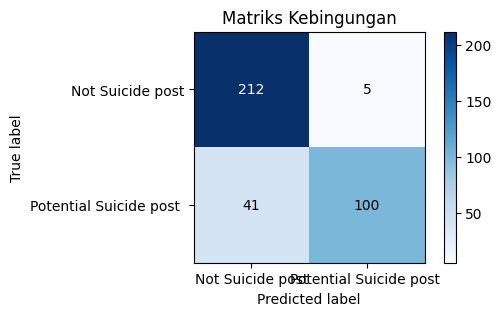

In [578]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import scikitplot as skplt
cm = confusion_matrix(Y_test,Y_predd)
print(cm)
print("Akurasi:", accuracy_score(Y_test, Y_predd))
print("Laporan Klasifikasi:\n", classification_report(Y_test, Y_predd))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, Y_predd))
skplt.metrics.plot_confusion_matrix(Y_test, Y_predd, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))

SVM dengan BOW

In [579]:
from sklearn.svm import SVC
# Inisialisasi model
modelSVMBOW = SVC()

# Latih model dengan data pelatihan
modelSVMBOW.fit(X_train_counts, Y_train)

SVC()

Akurasi: 0.8910614525139665
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.85      0.99      0.92       217
Potential Suicide post        0.98      0.74      0.84       141

               accuracy                           0.89       358
              macro avg       0.92      0.86      0.88       358
           weighted avg       0.90      0.89      0.89       358

Matriks Kebingungan:
 [[215   2]
 [ 37 104]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

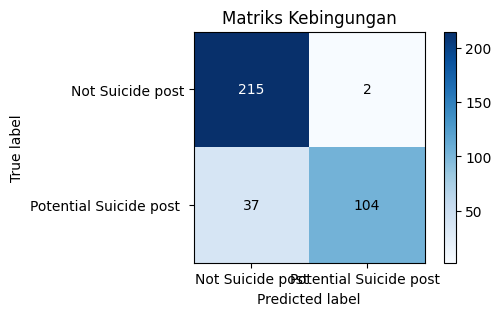

In [580]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Prediksi menggunakan data pengujian
y_predict = modelSVMBOW.predict(X_test_counts.toarray())

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, y_predict))
print("Laporan Klasifikasi:\n", classification_report(Y_test, y_predict))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, y_predict))

# Plot Confusion Matrix dengan ukuran khusus
skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=False, title='Matriks Kebingungan', figsize=(5, 3))


SVM dengan Word2Vec

In [581]:
from sklearn.svm import SVC
# Matriks embedding menggunakan Word2Vec
X_train_word2vec = get_embeddings(w2v_model, X_train, k=100)

# Mengonversi ke matriks NumPy homogen
X_train_word2vec_matrix = np.vstack(X_train_word2vec)

# Inisialisasi model
modelSVMW2v = SVC()

# Latih model dengan data pelatihan
modelSVMW2v.fit(X_train_word2vec, Y_train)


SVC()

Akurasi: 0.8324022346368715
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.82      0.92      0.87       217
Potential Suicide post        0.85      0.70      0.77       141

               accuracy                           0.83       358
              macro avg       0.84      0.81      0.82       358
           weighted avg       0.83      0.83      0.83       358

Matriks Kebingungan:
 [[200  17]
 [ 43  98]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

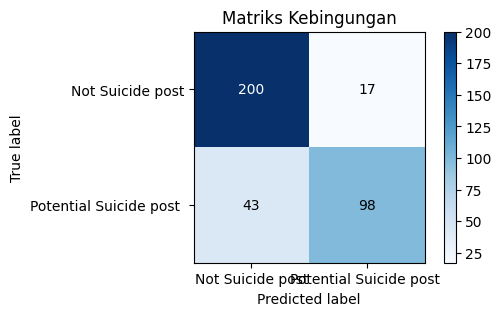

In [582]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt

# Matriks embedding menggunakan Word2Vec untuk data uji
X_test_word2vec = get_embeddings(w2v_model, X_test, k=100)

# Mengonversi ke matriks NumPy homogen
X_test_word2vec_matrix = np.vstack(X_test_word2vec)

# Prediksi menggunakan data pengujian
yy_predSVM= modelSVMW2v.predict(X_test_word2vec_matrix)

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test,yy_predSVM))
print("Laporan Klasifikasi:\n", classification_report(Y_test,yy_predSVM))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test,yy_predSVM))

# Plot Matriks Kebingungan
skplt.metrics.plot_confusion_matrix(Y_test,yy_predSVM, normalize=False, title='Matriks Kebingungan',figsize=(5,3))


Modelling dengan Random Forest

Random Forest dengan Tf-Idf

In [583]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier()
classifier1.fit(X_train_tfidf,Y_train)
# Melakukan prediksi
Y_pred = classifier1.predict(X_test_tfidf)

[[212   5]
 [ 31 110]]
Akurasi: 0.8994413407821229
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.87      0.98      0.92       217
Potential Suicide post        0.96      0.78      0.86       141

               accuracy                           0.90       358
              macro avg       0.91      0.88      0.89       358
           weighted avg       0.91      0.90      0.90       358

Matriks Kebingungan:
 [[212   5]
 [ 31 110]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

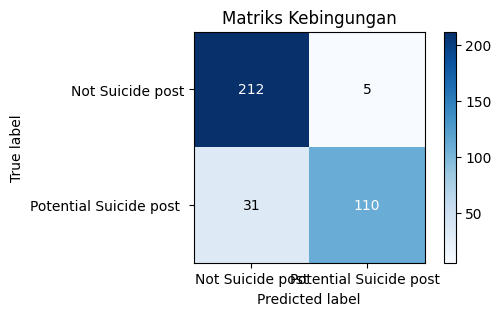

In [584]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import scikitplot as skplt
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print("Akurasi:", accuracy_score(Y_test, Y_pred))
print("Laporan Klasifikasi:\n", classification_report(Y_test, Y_pred))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, Y_pred))
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))

Random forest dengan BOW

In [585]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model
modelRFBOW = RandomForestClassifier()

# Latih model dengan data pelatihan
modelRFBOW.fit(X_train_counts, Y_train)

RandomForestClassifier()

Akurasi: 0.8966480446927374
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.86      0.99      0.92       217
Potential Suicide post        0.98      0.75      0.85       141

               accuracy                           0.90       358
              macro avg       0.92      0.87      0.89       358
           weighted avg       0.91      0.90      0.89       358

Matriks Kebingungan:
 [[215   2]
 [ 35 106]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

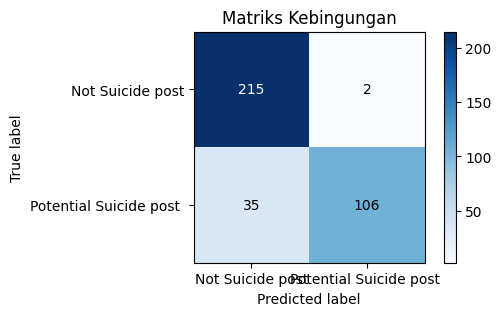

In [586]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Prediksi menggunakan data pengujian
y_predict = modelRFBOW.predict(X_test_counts.toarray())

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, y_predict))
print("Laporan Klasifikasi:\n", classification_report(Y_test, y_predict))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, y_predict))

# Plot Confusion Matrix dengan ukuran khusus
skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=False, title='Matriks Kebingungan', figsize=(5, 3))


Random forest dengan Word2vec

In [587]:
from sklearn.ensemble import RandomForestClassifier
# Matriks embedding menggunakan Word2Vec
X_train_word2vec = get_embeddings(w2v_model, X_train, k=100)

# Mengonversi ke matriks NumPy homogen
X_train_word2vec_matrix = np.vstack(X_train_word2vec)

# Inisialisasi model
modelRF =RandomForestClassifier()

# Latih model dengan data pelatihan
modelRF.fit(X_train_word2vec, Y_train)


RandomForestClassifier()

Akurasi: 0.8156424581005587
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.79      0.94      0.86       217
Potential Suicide post        0.87      0.62      0.73       141

               accuracy                           0.82       358
              macro avg       0.83      0.78      0.79       358
           weighted avg       0.82      0.82      0.81       358

Matriks Kebingungan:
 [[204  13]
 [ 53  88]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

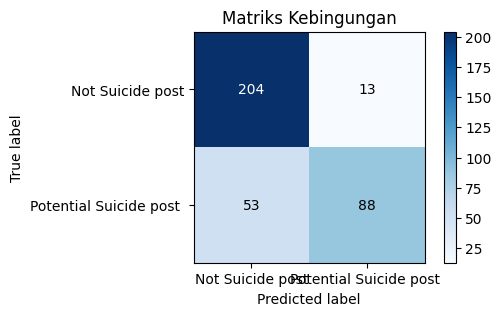

In [588]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt

# Matriks embedding menggunakan Word2Vec untuk data uji
X_test_word2vec = get_embeddings(w2v_model, X_test, k=100)

# Mengonversi ke matriks NumPy homogen
X_test_word2vec_matrix = np.vstack(X_test_word2vec)

# Prediksi menggunakan data pengujian
y_predRF = modelRF.predict(X_test_word2vec_matrix)

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test,y_predRF))
print("Laporan Klasifikasi:\n", classification_report(Y_test,y_predRF))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test,y_predRF))

# Plot Matriks Kebingungan
skplt.metrics.plot_confusion_matrix(Y_test,y_predRF, normalize=False, title='Matriks Kebingungan',figsize=(5,3))


Modelling Decision Tress

Decision Tree dengan Tf-Idf

In [589]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
modelDC = DecisionTreeClassifier()

# Latih model dengan data pelatihan
modelDC.fit(X_train_tfidf, Y_train)
# Melakukan prediksi
y_predi = modelDC.predict(X_test_tfidf)


Akurasi: 0.88268156424581
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.88      0.94      0.91       217
Potential Suicide post        0.89      0.80      0.84       141

               accuracy                           0.88       358
              macro avg       0.88      0.87      0.87       358
           weighted avg       0.88      0.88      0.88       358

Matriks Kebingungan:
 [[203  14]
 [ 28 113]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

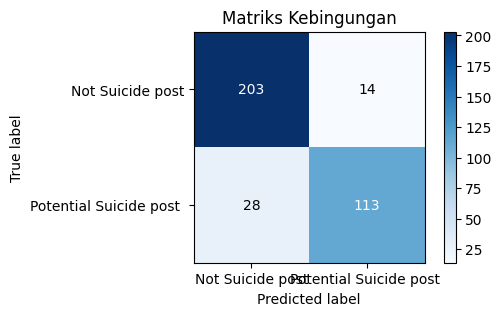

In [590]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, y_predi))
print("Laporan Klasifikasi:\n", classification_report(Y_test, y_predi))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, y_predi))
skplt.metrics.plot_confusion_matrix(Y_test, y_predi, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))


In [591]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
modeldc = DecisionTreeClassifier()

# Latih model dengan data pelatihan
modeldc.fit(X_train_counts, Y_train)



DecisionTreeClassifier()

Akurasi: 0.8910614525139665
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.87      0.96      0.91       217
Potential Suicide post        0.93      0.78      0.85       141

               accuracy                           0.89       358
              macro avg       0.90      0.87      0.88       358
           weighted avg       0.90      0.89      0.89       358

Matriks Kebingungan:
 [[209   8]
 [ 31 110]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

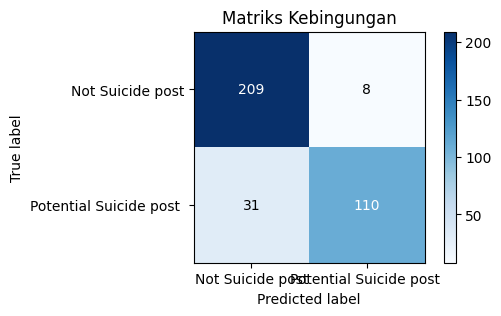

In [592]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Prediksi menggunakan data pengujian
y_prediction = modeldc.predict(X_test_counts.toarray())

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, y_prediction))
print("Laporan Klasifikasi:\n", classification_report(Y_test, y_prediction))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, y_prediction))

# Plot Confusion Matrix dengan ukuran khusus
skplt.metrics.plot_confusion_matrix(Y_test, y_prediction, normalize=False, title='Matriks Kebingungan', figsize=(5, 3))


Modelling Regtesi Logistik

Regresi Logistic dengan Tf-Idf

In [593]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi model
model1 = LogisticRegression()

# Latih model dengan data pelatihan
model1.fit(X_train_tfidf, Y_train)
# Melakukan prediksi
Y_predi = model1.predict(X_test_tfidf)

Akurasi: 0.8631284916201117
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.82      0.99      0.90       217
Potential Suicide post        0.97      0.67      0.79       141

               accuracy                           0.86       358
              macro avg       0.90      0.83      0.85       358
           weighted avg       0.88      0.86      0.86       358

Matriks Kebingungan:
 [[214   3]
 [ 46  95]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

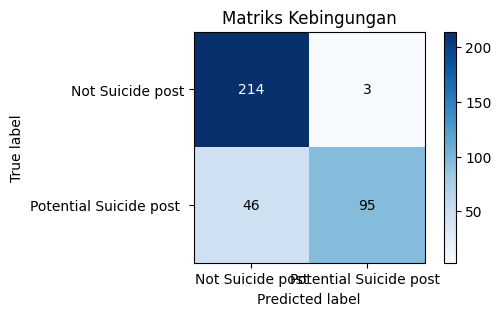

In [594]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, Y_predi))
print("Laporan Klasifikasi:\n", classification_report(Y_test, Y_predi))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, Y_predi))
skplt.metrics.plot_confusion_matrix(Y_test, Y_predi, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))


Regresi Logistic dengan BOW

In [595]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi model
modelLG = LogisticRegression()

# Latih model dengan data pelatihan
modelLG.fit(X_train_counts, Y_train)

LogisticRegression()

Akurasi: 0.888268156424581
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.86      0.98      0.91       217
Potential Suicide post        0.95      0.75      0.84       141

               accuracy                           0.89       358
              macro avg       0.91      0.86      0.88       358
           weighted avg       0.90      0.89      0.89       358

Matriks Kebingungan:
 [[212   5]
 [ 35 106]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

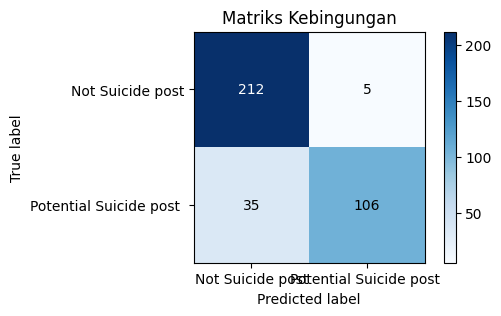

In [596]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Prediksi menggunakan data pengujian
y_predict = modelLG.predict(X_test_counts.toarray())

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, y_predict))
print("Laporan Klasifikasi:\n", classification_report(Y_test, y_predict))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, y_predict))

# Plot Confusion Matrix dengan ukuran khusus
skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=False, title='Matriks Kebingungan', figsize=(5, 3))


Modelling dengan Gaussian 

GaussianNB dengan Tf-Idf

Hanya mencoba memastikan apakah benar akurasinya kecil

In [597]:
from sklearn.naive_bayes import GaussianNB
# Inisialisasi model
modelGNB = GaussianNB()
X_t=X_train_tfidf.toarray()
# Latih model dengan data pelatihan
modelGNB.fit(X_t, Y_train)

GaussianNB()

Akurasi: 0.6480446927374302
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.83      0.53      0.64       217
Potential Suicide post        0.53      0.84      0.65       141

               accuracy                           0.65       358
              macro avg       0.68      0.68      0.65       358
           weighted avg       0.71      0.65      0.65       358

Matriks Kebingungan:
 [[114 103]
 [ 23 118]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

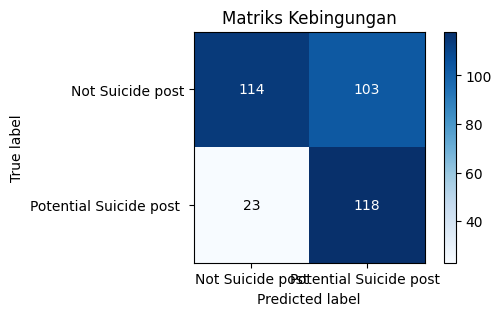

In [598]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

X_test_arr=X_test_tfidf.toarray()
# Prediksi menggunakan data pengujian
y_preed = modelGNB.predict(X_test_arr)


# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, y_preed))
print("Laporan Klasifikasi:\n", classification_report(Y_test, y_preed))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, y_preed))
skplt.metrics.plot_confusion_matrix(Y_test, y_preed, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))


Modelling dengan Linear SVM

LinearSVC dengan Tf-Idf

In [599]:
from sklearn.svm import LinearSVC
# Inisialisasi model
modelSVC = LinearSVC()

# Latih model dengan data pelatihan
modelSVC.fit(X_train_tfidf, Y_train)

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Akurasi: 0.8966480446927374
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.88      0.97      0.92       217
Potential Suicide post        0.94      0.79      0.86       141

               accuracy                           0.90       358
              macro avg       0.91      0.88      0.89       358
           weighted avg       0.90      0.90      0.89       358

Matriks Kebingungan:
 [[210   7]
 [ 30 111]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

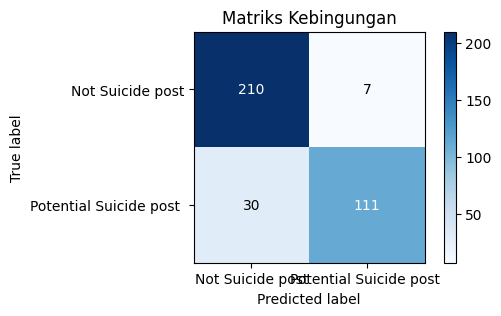

In [600]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Prediksi menggunakan data pengujian
Y_preed = modelSVC.predict(X_test_arr)

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test,Y_preed))
print("Laporan Klasifikasi:\n", classification_report(Y_test,Y_preed))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test,Y_preed))
skplt.metrics.plot_confusion_matrix(Y_test,Y_preed, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))


LinearSVC dengan BOW

In [601]:
from sklearn.svm import LinearSVC
# Inisialisasi model
modelLSBOW = LinearSVC()

# Latih model dengan data pelatihan
modelLSBOW.fit(X_train_counts, Y_train)

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Akurasi: 0.9050279329608939
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.87      0.99      0.93       217
Potential Suicide post        0.98      0.77      0.87       141

               accuracy                           0.91       358
              macro avg       0.93      0.88      0.90       358
           weighted avg       0.91      0.91      0.90       358

Matriks Kebingungan:
 [[215   2]
 [ 32 109]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

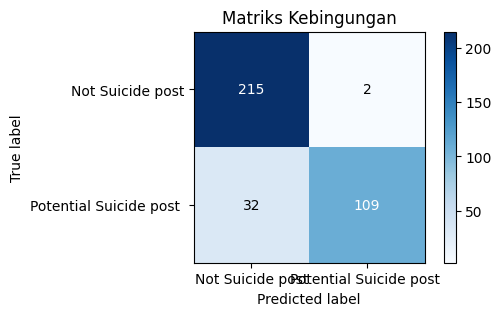

In [602]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt 

# Prediksi menggunakan data pengujian
yy_predd = modelLSBOW.predict(X_test_counts)

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, yy_predd))
print("Laporan Klasifikasi:\n", classification_report(Y_test, yy_predd))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, yy_predd))
skplt.metrics.plot_confusion_matrix(Y_test, yy_predd, normalize=False, title = 'Matriks Kebingungan',figsize=(5,3))


LinearSVC dengan Word2Vec

In [603]:
from sklearn.svm import LinearSVC
# Matriks embedding menggunakan Word2Vec
X_train_word2vec = get_embeddings(w2v_model, X_train, k=100)

# Mengonversi ke matriks NumPy homogen
X_train_word2vec_matrix = np.vstack(X_train_word2vec)

# Inisialisasi model
modelW2v = LinearSVC()

# Latih model dengan data pelatihan
modelW2v.fit(X_train_word2vec, Y_train)


c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Akurasi: 0.6089385474860335
Laporan Klasifikasi:
                          precision    recall  f1-score   support

       Not Suicide post       0.61      0.99      0.75       217
Potential Suicide post        0.60      0.02      0.04       141

               accuracy                           0.61       358
              macro avg       0.60      0.51      0.40       358
           weighted avg       0.61      0.61      0.47       358

Matriks Kebingungan:
 [[215   2]
 [138   3]]


<Axes: title={'center': 'Matriks Kebingungan'}, xlabel='Predicted label', ylabel='True label'>

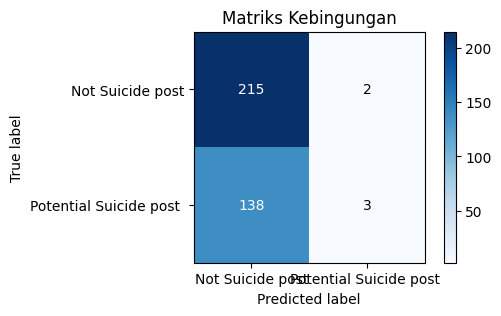

In [604]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt

# Matriks embedding menggunakan Word2Vec untuk data uji
X_test_word2vec = get_embeddings(w2v_model, X_test, k=100)

# Mengonversi ke matriks NumPy homogen
X_test_word2vec_matrix = np.vstack(X_test_word2vec)

# Prediksi menggunakan data pengujian
yy_pred = modelW2v.predict(X_test_word2vec_matrix)

# Evaluasi performa model
print("Akurasi:", accuracy_score(Y_test, yy_pred))
print("Laporan Klasifikasi:\n", classification_report(Y_test, yy_pred))
print("Matriks Kebingungan:\n", confusion_matrix(Y_test, yy_pred))

# Plot Matriks Kebingungan
skplt.metrics.plot_confusion_matrix(Y_test, yy_pred, normalize=False, title='Matriks Kebingungan',figsize=(5,3))
